#Importar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Benchmark
R2 =  0.16

MAE =  207.17

MSE =  65779.94

#Importar o dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/tópicos/Dataset_produtividade.csv')

df.head()

,ID,ARVI_mean_,ARVI_mean_0,ARVI_mean_0.2,ARVI_mean_0.4,ARVI_mean_0.6,ARVI_std_,ARVI_std_0,ARVI_std_0.2,ARVI_std_0.4,...,rededge_mean_0,rededge_mean_0.2,rededge_mean_0.4,rededge_mean_0.6,rededge_std_,rededge_std_0,rededge_std_0.2,rededge_std_0.4,rededge_std_0.6,produtividade
0,1,0.826175,0.826175,0.826175,0.830084,0.891440,0.204087,0.204087,0.204087,0.198302,...,0.102632,0.102632,0.102359,0.101120,0.014673,0.014673,0.014673,0.014254,0.013392,471.7
1,2,0.929867,0.929867,0.929867,0.929867,0.930354,0.044495,0.044495,0.044495,0.044495,...,0.107168,0.107168,0.107168,0.107170,0.014065,0.014065,0.014065,0.014065,0.014072,677.0
2,3,0.935018,0.935018,0.935018,0.935018,0.935018,0.038189,0.038189,0.038189,0.038189,...,0.102992,0.102992,0.102992,0.102992,0.011667,0.011667,0.011667,0.011667,0.011667,NaN
3,4,0.924935,0.924935,0.924935,0.924935,0.925422,0.053082,0.053082,0.053082,0.053082,...,0.100519,0.100519,0.100519,0.100532,0.015275,0.015275,0.015275,0.015275,0.015277,905.6
4,5,0.924226,0.924226,0.924226,0.924226,0.924226,0.057756,0.057756,0.057756,0.057756,...,0.101913,0.101913,0.101913,0.101913,0.013607,0.013607,0.013607,0.013607,0.013607,670.1


#preprocessamento e visualização dos dados

##dados faltantes

In [4]:
for i in df.columns:
  if df[i].isna().sum() != 0:
    print(i, df[i].isna().sum())


produtividade 18


In [5]:
df = df.fillna(0)

In [6]:
# X = df.loc[:,['ARVI_mean_',	'NDVI_mean_']]
X = df.drop(['ID', 'produtividade'], axis = 1)
y = df.loc[:,['produtividade']]


In [7]:
X.head()

,ARVI_mean_,ARVI_mean_0,ARVI_mean_0.2,ARVI_mean_0.4,ARVI_mean_0.6,ARVI_std_,ARVI_std_0,ARVI_std_0.2,ARVI_std_0.4,ARVI_std_0.6,...,rededge_mean_,rededge_mean_0,rededge_mean_0.2,rededge_mean_0.4,rededge_mean_0.6,rededge_std_,rededge_std_0,rededge_std_0.2,rededge_std_0.4,rededge_std_0.6
0,0.826175,0.826175,0.826175,0.830084,0.891440,0.204087,0.204087,0.204087,0.198302,0.101132,...,0.102632,0.102632,0.102632,0.102359,0.101120,0.014673,0.014673,0.014673,0.014254,0.013392
1,0.929867,0.929867,0.929867,0.929867,0.930354,0.044495,0.044495,0.044495,0.044495,0.041743,...,0.107168,0.107168,0.107168,0.107168,0.107170,0.014065,0.014065,0.014065,0.014065,0.014072
2,0.935018,0.935018,0.935018,0.935018,0.935018,0.038189,0.038189,0.038189,0.038189,0.038189,...,0.102992,0.102992,0.102992,0.102992,0.102992,0.011667,0.011667,0.011667,0.011667,0.011667
3,0.924935,0.924935,0.924935,0.924935,0.925422,0.053082,0.053082,0.053082,0.053082,0.050801,...,0.100519,0.100519,0.100519,0.100519,0.100532,0.015275,0.015275,0.015275,0.015275,0.015277
4,0.924226,0.924226,0.924226,0.924226,0.924226,0.057756,0.057756,0.057756,0.057756,0.057756,...,0.101913,0.101913,0.101913,0.101913,0.101913,0.013607,0.013607,0.013607,0.013607,0.013607


In [8]:
X.shape

(297, 350)

In [9]:
y.head()

,produtividade
0,471.7
1,677.0
2,0.0
3,905.6
4,670.1


##dividir o banco de dados em treinamento e teste

In [10]:
# dividir o banco de dados em treinamento e teste.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


##Padronizar o conjunto de dados em média 0 e desvio padrão 1

In [11]:
# padronizar o conjunto de dados
from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler()           #cria um objeto
scaleX = scaleX.fit(X_train)        #ajusta aos dados
X_train_sc = scaleX.transform(X_train) #transforma os dados
X_test_sc = scaleX.transform(X_test)   #utransforma os dados

X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

In [12]:
X_train_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Columns: 350 entries, ARVI_mean_ to rededge_std_0.6
dtypes: float64(350)
memory usage: 607.2 KB


##Redução da dimensionalidade com PCA


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [14]:
var = pca.explained_variance_ratio_
var

array([0.62127874, 0.1818185 , 0.07486958])

In [15]:
X_train_pca[:10]

array([[ 10.24327588,  -0.09490081,   1.84223967],
       [ -0.50426452,  -7.59796063,  -2.24716777],
       [ -5.35271401,   3.70416103,  -1.17170114],
       [  6.62346689,  -1.08253599,   7.23560466],
       [-11.42234539,   8.23357772,   5.28844607],
       [-11.02374223,   4.32502255,   2.12222493],
       [ -3.81121808,   1.93822528,   7.15728375],
       [-10.13010982,  -2.39049265,  -6.26965088],
       [-11.67516317,   6.37515252,  -0.78805351],
       [-14.29564542,   5.74539366,  -2.85092128]])

# Construção da rede neural e otimização com skop

In [16]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(hidden_units=4, learning_rate=0.01):
    ann = Sequential()
    ann.add(Dense(units=hidden_units, input_dim=3, activation='relu'))
    ann.add(Dense(units=3, activation='relu'))
    ann.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)

    ann.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return ann


param_space = {
    'hidden_units': (2, 32),
    'learning_rate': (0.001, 0.1, 'log-uniform')
}

# Criar o modelo como um estimador do scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=0)

# Realizar busca bayesiana para encontrar os melhores hiperparâmetros
bayes_cv_tuner = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    n_iter=20,
    verbose=0
)


<ipython-input-17-2f7293f398b7>:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [18]:
# Ajustar o modelo aos dados de treinamento
bayes_cv_tuner.fit(X_train_pca, y_train)

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros: ", bayes_cv_tuner.best_params_)

# Avaliar o modelo com os melhores parâmetros usando o conjunto de validação
best_model = bayes_cv_tuner.best_estimator_

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Melhores parâmetros:  OrderedDict([('hidden_units', 32), ('learning_rate', 0.1)])


In [19]:
# Avaliar o modelo com os melhores parâmetros usando o conjunto de validação

history = best_model.fit(X_train_pca, y_train, batch_size= 10, validation_split=0.1, epochs = 100)

#Plotar gráficos

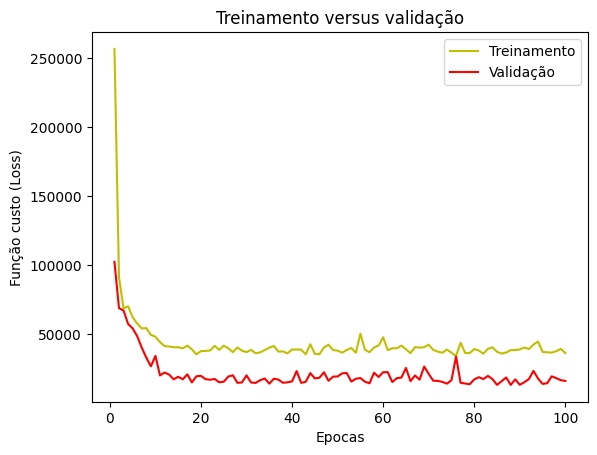

In [20]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['loss'] # Treinamento
val_loss = history.history['val_loss'] # Validação

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Função custo (Loss)")
plt.legend()
plt.show()



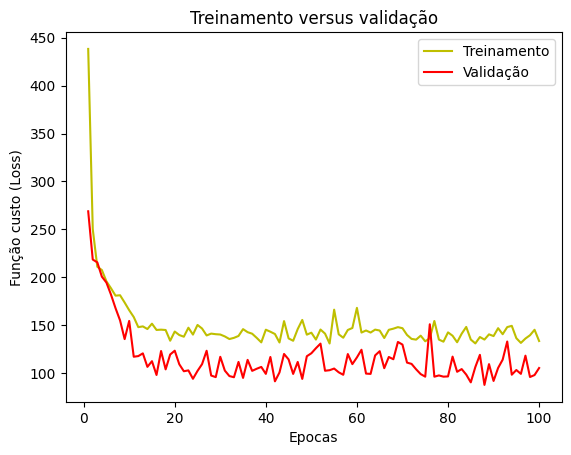

In [21]:
acc = history.history['mae'] # Treinamento

val_acc = history.history['val_mae'] # Validação

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, acc, 'y', label = "Treinamento")
plt.plot(epochs, val_acc, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Função custo (Loss)")
plt.legend()
plt.show()


#Predição nos dados de teste

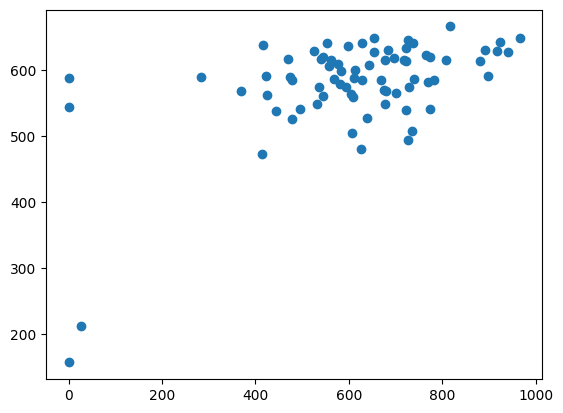

In [22]:
#predição dos dados de teste
y_pred = best_model.predict(X_test_pca)

plt.scatter(y_test, y_pred)
plt.show()


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear = LinearRegression()
linear.fit(y_test, y_pred)

r2 = linear.score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 = ', round(r2, 2))
print("MAE = ", round(mae, 2))
print("MSE = ", round(mse, 2))

R2 =  0.31
MAE =  131.37
MSE =  29686.61


#Traçar a curva de regressão nos dados preditos versus observados

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


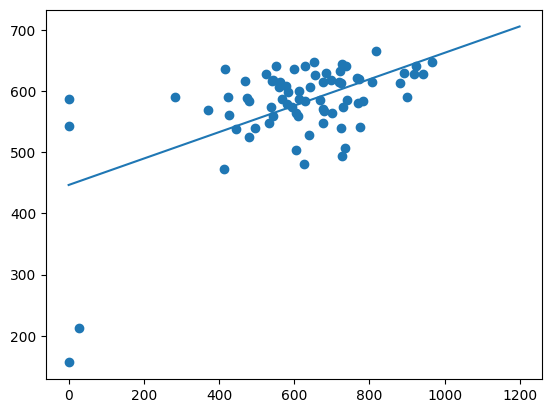

In [24]:
#predição dos dados de teste
y_pred = best_model.predict(X_test_pca)

y = np.arange(0, 1200)
y = np.expand_dims(y, axis=1)

yp = linear.predict(y)

plt.scatter(y_test, y_pred)
plt.plot(y, yp)
plt.show()